# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

Pu Zheng: updated this example to match version for 2018.12.20

# Imports

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, classes
print(os.getpid())

49956


In [2]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.External.Fitting_v3)

<module 'ImageAnalysis3.External.Fitting_v3' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\External\\Fitting_v3.py'>

# Create Cell_Data object

## create cell_data class and load basic info

In [3]:
fov_id = 36
cell_id = 20
# specify initialization parameters:

param = {'data_folder':r'Y:\20190302_IMR90_CTP05_intronFISH',
         'fov_id': fov_id,
         'cell_id': cell_id,
         'save_folder':r'\\chem-zhuanglab\SSD_01\20190302_intronicRNA_unique',
         'num_threads': 18,
         'correction_folder':r'I:\Corrections',
         };
# initialize cell_data class:
rna = ia.classes.Cell_Data(param)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 60
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 33 folders are found according to color-usage annotation.


## Load more info for cell

In [4]:
# load existing cell_info, dont run for the first time
rna._load_from_file('cell_info')
# load segmentation
rna._load_segmentation(_force=False);
# load drift info
drift = rna._load_drift(_size=350, _dynamic=True, _coord_sel=[500,500],
                      _num_threads=18,_sequential_mode=False,_force=False)

- drift already exists for cell:20, skip


### check drift

In [9]:
crop = np.array([[0,30],[500,1000],[500,1000]])
data_folder = r'Y:\20190302_IMR90_CTP05_intronFISH'
test_ims = [corrections.correct_single_image(os.path.join(data_folder, _hyb_name),
                                              488, crop_limits=crop, drift=_dft, verbose=True)
                                              for _hyb_name, _dft in rna.drift.items()]

- Start correcting H1R1\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H2R2\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H3R3\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H4R4\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H5R5\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H

<IPython.core.display.Javascript object>


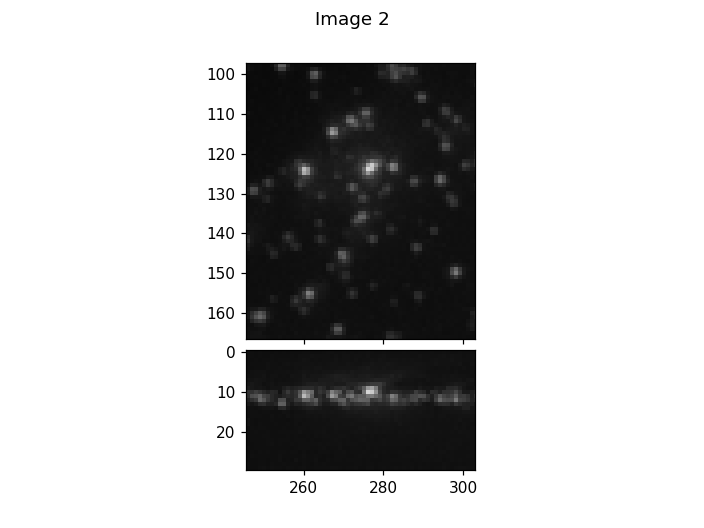

In [10]:
%matplotlib notebook
#lst.cells[2]._load_from_file('unique')
#visual_tools.imshow_mark_3d_v2(lst.cells[2].unique_ims)
visual_tools.imshow_mark_3d_v2(test_ims)

# Load and crop images from raw data

In [5]:
unique_ims, unique_ids, unique_channels = rna._crop_images('unique',_load_in_ram=True)

- Start cropping unique image
- 89 already exists in unique_ims, skip!
- 2 already exists in unique_ims, skip!
- 23 already exists in unique_ims, skip!
- 24 already exists in unique_ims, skip!
- 7 already exists in unique_ims, skip!
- 64 already exists in unique_ims, skip!
- 73 already exists in unique_ims, skip!
- 59 already exists in unique_ims, skip!
- 20 already exists in unique_ims, skip!
- 18 already exists in unique_ims, skip!
- 43 already exists in unique_ims, skip!
- 85 already exists in unique_ims, skip!
- 92 already exists in unique_ims, skip!
- 5 already exists in unique_ims, skip!
- 28 already exists in unique_ims, skip!
- 88 already exists in unique_ims, skip!
- 41 already exists in unique_ims, skip!
- 46 already exists in unique_ims, skip!
- 29 already exists in unique_ims, skip!
- 27 already exists in unique_ims, skip!
- 62 already exists in unique_ims, skip!
- 71 already exists in unique_ims, skip!
- 45 already exists in unique_ims, skip!
- 79 already exists in unique_

## Save to file 

In [8]:
#a._save_to_file('all') # save all

rna._save_to_file('cell_info') # save all cell_info exclude images

#a._save_to_file('unique') # save unique info into unique_rounds.npz

- Save cell_info to: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl


# Generate and Pick chromosome

## generate and identify chromosome

C:\Users\puzheng\AppData\Local\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:361: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


<IPython.core.display.Javascript object>


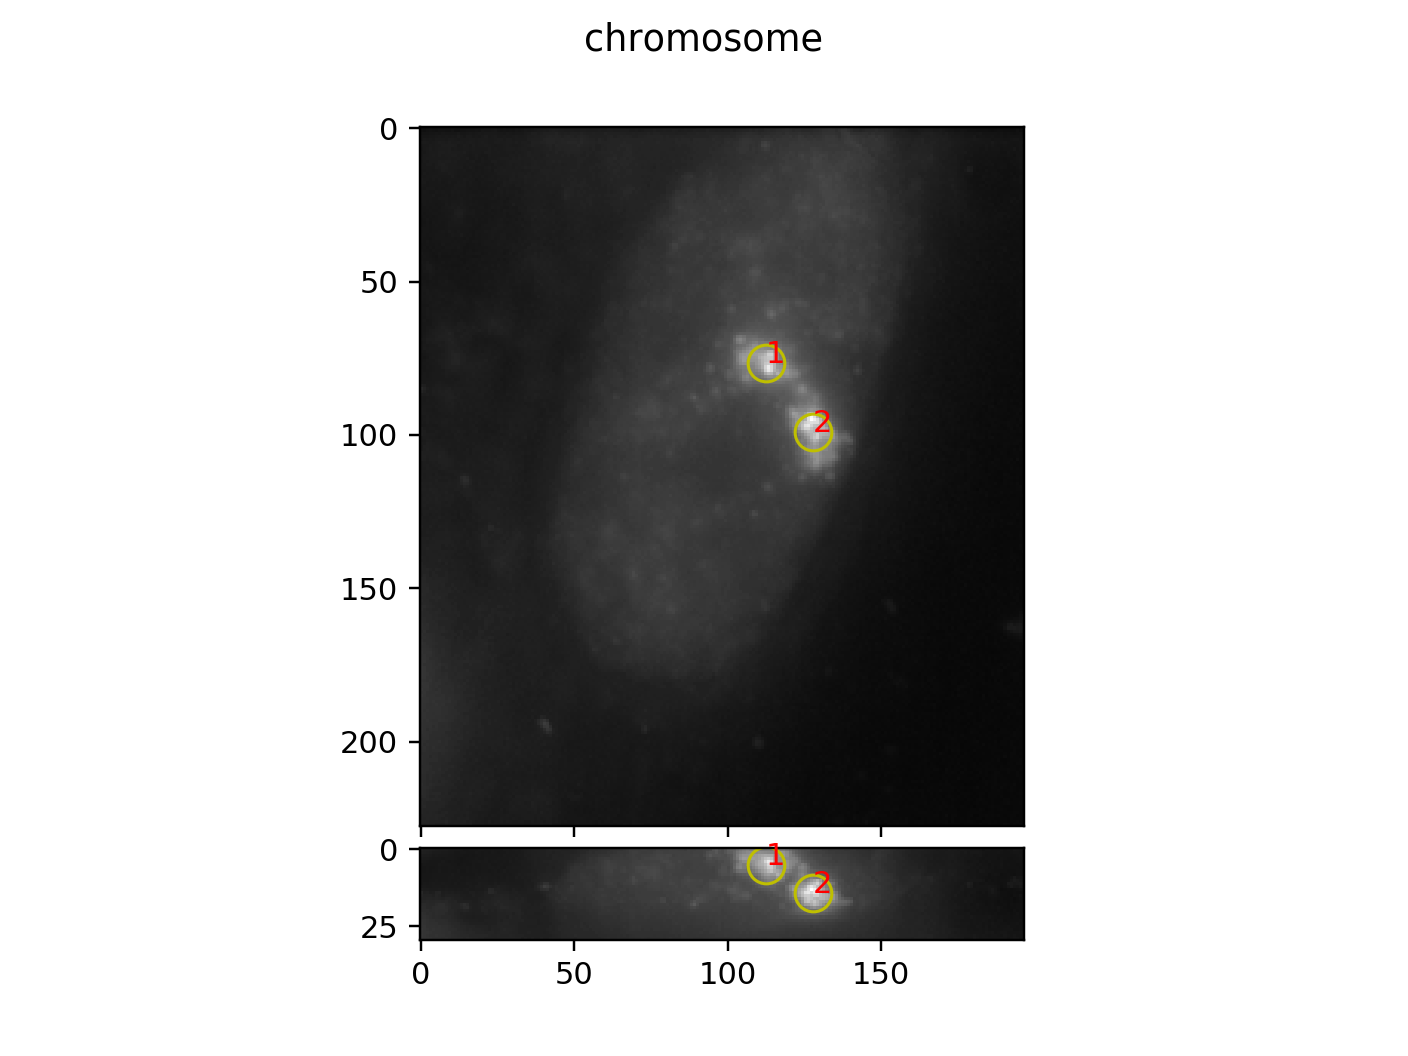

In [14]:
# generate
rna._generate_chromosome_image('unique')
# identify
rna._identify_chromosomes();
# manually pick for only this cell
rna._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

## Update chromosome coordinate info

In [15]:
rna._update_chromosome_from_file();

-- 2 loaded
- Save cell_info to: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation', 'chrom_coord']
- Writing cell data to file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl


# Fitting and picking spots for unique images

## Load unique images

In [20]:
# unique
rna._load_from_file('unique', _overwrite=False)

- Loading unique from file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-26\cell-22\unique_rounds.npz
-- loading image with unique_id:
[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,

## multi-fitting

In [50]:
cand_spots = a._multi_fitting_for_chromosome(_type='unique', _num_threads=20, _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-7, _save=False)
#cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

+ Start multi-fitting for unique images
++ start fitting unique for fov:37, cell:0 with 20 threads
++ total time in fitting unique: 15.647680521011353


## picking spots by intensity

In [51]:
naive_picked_pts = rna._naive_picking_spots('unique', _save=False)

+ Pick unique spots for by brightness in fov:37, cell:0


### distance map for one chromosome

In [52]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{rna.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * rna.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))
# plot
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=0, vmax=2000)
plt.colorbar()

chromosome id:0, coordinate:[  5.07342105  76.56026316 112.51026316]


## dynamic picking spots

In [56]:
dynamic_picked_pts = rna._dynamic_picking_spots('unique', _w_dist=1)

+ Pick unique spots for by brightness in fov:37, cell:0
- Save cell_info to: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl


++ generate unique dist-map for fov:37, cell:0, chrom:0


<IPython.core.display.Javascript object>


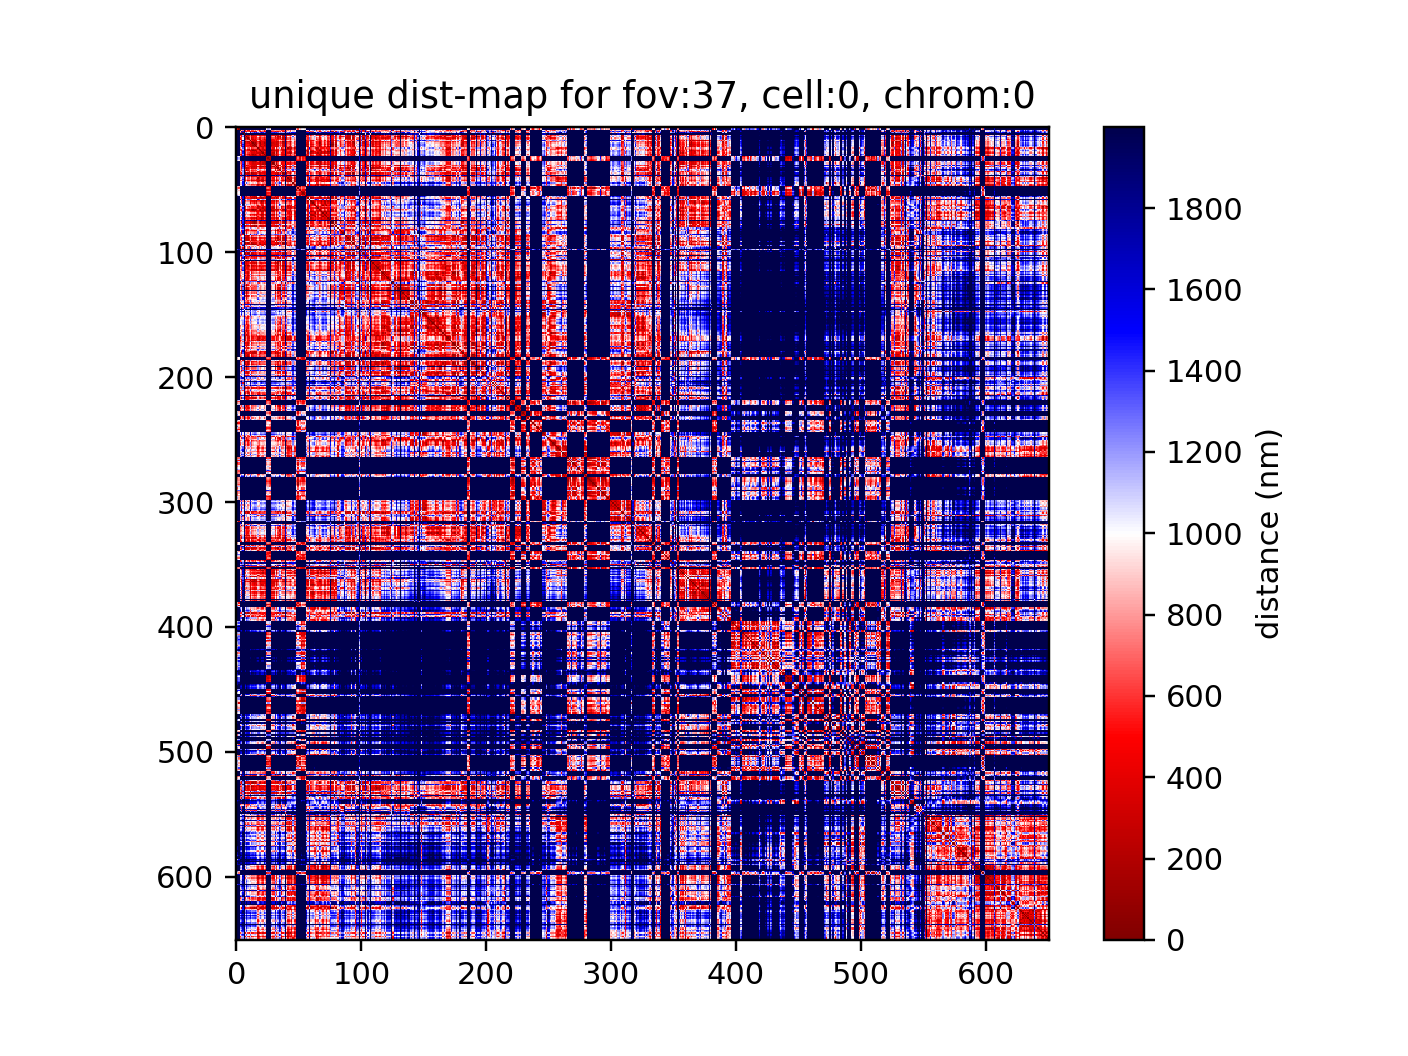

++ generate unique dist-map for fov:37, cell:0, chrom:1


<IPython.core.display.Javascript object>


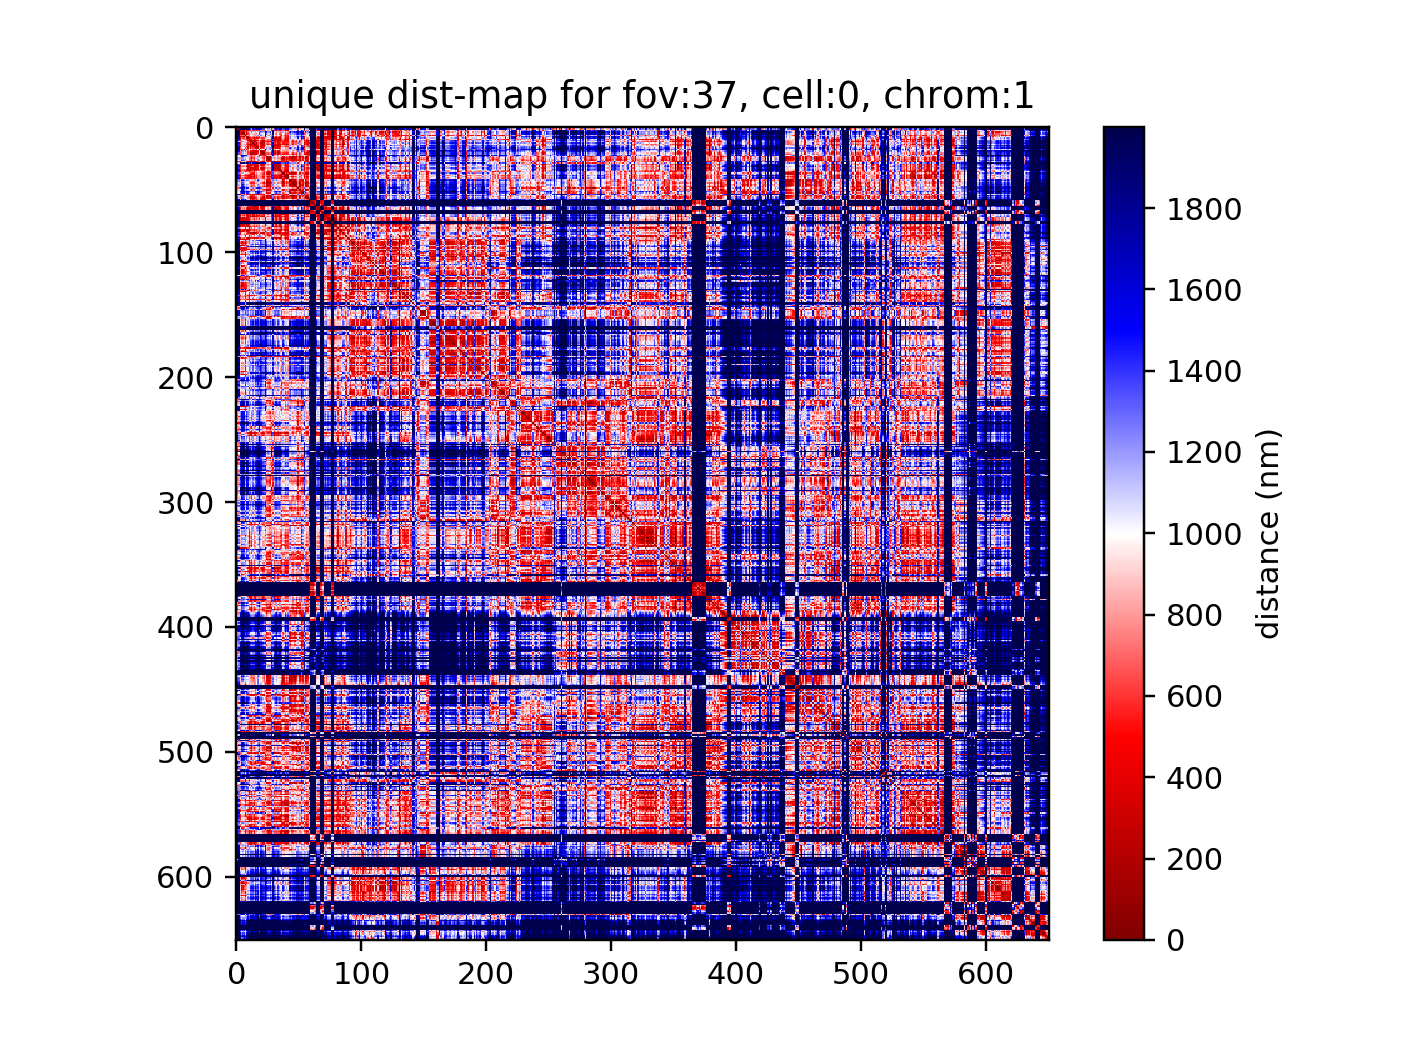

- Save cell_info to: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-37\cell-0\cell_info.pkl


In [57]:
distmaps = rna._generate_distance_map('unique',_limits=[0,2000])

<IPython.core.display.Javascript object>


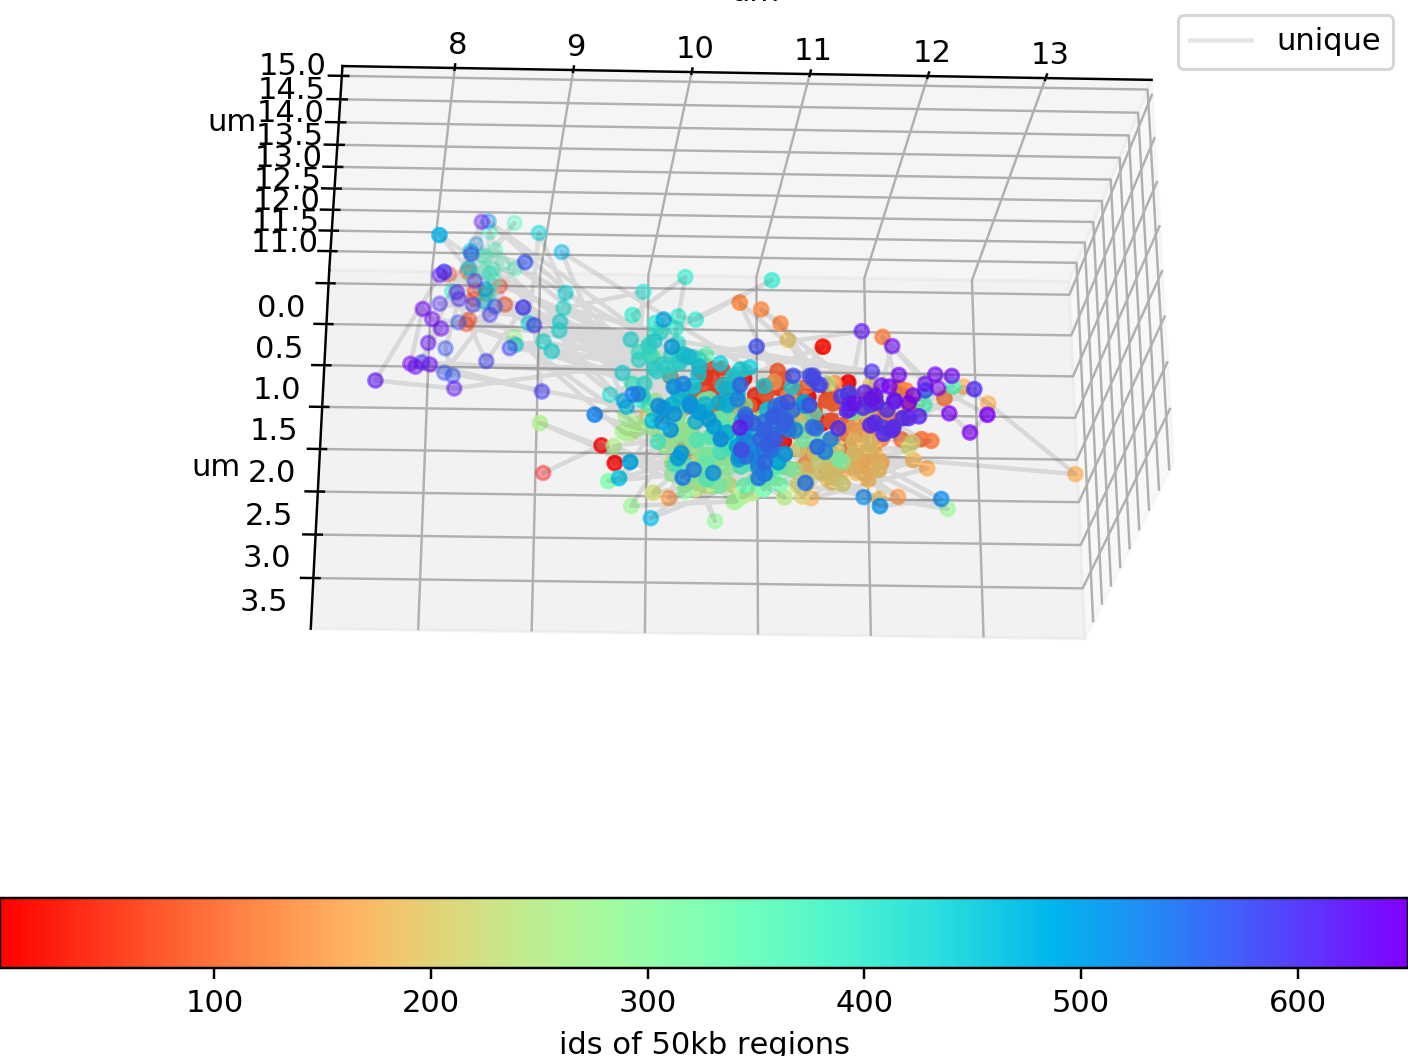

In [58]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
du_pts = np.array(dynamic_picked_pts[1])[:,1:4]*rna.distance_zxy/1000
#dd_pts = np.array(dynamic_decoded_pts[0])[:,1:4][277:325]*a.distance_zxy

du_pts = du_pts[:]
#dd_pts = dd_pts[30:]
sc = ax.scatter3D(du_pts[:,1], du_pts[:,2],du_pts[:,0], c=np.array(rna.unique_ids), cmap='rainbow_r')
ax.plot(du_pts[:,1], du_pts[:,2],du_pts[:,0], label='unique', alpha=0.1, color='black')
#ax.plot(dd_pts[:,1], dd_pts[:,2],dd_pts[:,0], label='decoded', alpha=0.5)
plt.legend()
plt.xlabel('um')
plt.ylabel('um')
ax.set_zlabel('um')
cb = plt.colorbar(sc,ticks=np.arange(0,651,100),orientation="horizontal")
cb.set_label('ids of 50kb regions')
